<a href="https://colab.research.google.com/github/Youssiffawzy/UK-Train-Rides/blob/main/Railway.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

import pandas as pd

df = pd.read_excel("railway.xlsx")
df.info()

Saving railway.xlsx to railway.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31635 entries, 0 to 31634
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       31635 non-null  object        
 1   Date of Purchase     31635 non-null  datetime64[ns]
 2   Time of Purchase     31635 non-null  object        
 3   Purchase Type        31635 non-null  object        
 4   Payment Method       31635 non-null  object        
 5   Railcard             10724 non-null  object        
 6   Ticket Class         31635 non-null  object        
 7   Ticket Type          31635 non-null  object        
 8   Price                31635 non-null  int64         
 9   Departure Station    31635 non-null  object        
 10  Arrival Destination  31635 non-null  object        
 11  Date of Journey      31635 non-null  datetime64[ns]
 12  Departure Time       31635 non-null  object        


In [3]:
# How do passenger demographics (Railcard type, Ticket Class) influence their tolerance for delays and likelihood of requesting refunds?

# Clean Railcard column: Replace "None" with "No Railcard" and handle missing values
df['Railcard'] = df['Railcard'].replace('None', 'No Railcard').fillna('No Railcard')

# Convert refund requests to numerical values (Yes=1, No=0)
df['Refund Requested'] = df['Refund Request'].apply(lambda x: 1 if x == 'Yes' else 0)

# Analyze by Railcard type
railcard_analysis = df.groupby('Railcard').agg({
    'Delayed minuts': 'mean',
    'Refund Requested': 'mean'
}).reset_index()

# Analyze by Ticket Class
class_analysis = df.groupby('Ticket Class').agg({
    'Delayed minuts': 'mean',
    'Refund Requested': 'mean'
}).reset_index()

# Analyze delayed journeys
delayed_journeys = df[df['Delayed minuts'] > 0]
delay_reasons = delayed_journeys['Reason for Delay'].value_counts()

# Show results
print("Railcard Analysis:")
print(railcard_analysis)
print("\nTicket Class Analysis:")
print(class_analysis)
print("\nDelayed Journey Analysis:")
print(f"Total delayed journeys: {len(delayed_journeys)}")
print("Top delay reasons:")
print(delay_reasons)

Railcard Analysis:
      Railcard  Delayed minuts  Refund Requested
0        Adult        6.320485          0.086175
1     Disabled        2.114217          0.019430
2  No Railcard        3.056877          0.024580
3       Senior        0.540000          0.042546

Ticket Class Analysis:
  Ticket Class  Delayed minuts  Refund Requested
0  First Class        3.476870          0.036637
1     Standard        3.227567          0.034922

Delayed Journey Analysis:
Total delayed journeys: 2274
Top delay reasons:
Reason for Delay
Weather               755
Technical Issue       464
Signal Failure        242
Signal failure        209
Staff Shortage        183
Staffing              169
Weather Conditions    166
Traffic                86
Name: count, dtype: int64


In [4]:
# Do online purchasers behave differently than station buyers (e.g., refund habits, route choices)?

# Clean refund data
df['Refund Requested'] = df['Refund Request'].apply(lambda x: 1 if x == 'Yes' else 0)

# Analyze purchase types
purchase_types = df['Purchase Type'].unique()
print(f"Available purchase types: {purchase_types}")

# Compare online vs station purchases
if 'Station' in purchase_types:
    # Refund behavior comparison
    refund_comparison = df.groupby('Purchase Type')['Refund Requested'].mean().reset_index()
    refund_comparison.columns = ['Purchase Type', 'Refund Rate']
    print("\nRefund Rate Comparison:")
    print(refund_comparison)

    # Route preference analysis
    print("\nTop Routes for Online Purchases:")
    online_routes = df[df['Purchase Type'] == 'Online']
    online_top_routes = online_routes.groupby(['Departure Station', 'Arrival Destination']).size().reset_index(name='Count')
    print(online_top_routes.sort_values('Count', ascending=False).head())

    print("\nTop Routes for Station Purchases:")
    station_routes = df[df['Purchase Type'] == 'Station']
    station_top_routes = station_routes.groupby(['Departure Station', 'Arrival Destination']).size().reset_index(name='Count')
    print(station_top_routes.sort_values('Count', ascending=False).head())

else:
    print("\nNo station purchase data available for comparison")

Available purchase types: ['Online' 'Station']

Refund Rate Comparison:
  Purchase Type  Refund Rate
0        Online     0.022089
1       Station     0.053434

Top Routes for Online Purchases:
        Departure Station    Arrival Destination  Count
35  Manchester Piccadilly  Liverpool Lime Street   2631
30      London Paddington                Reading   2441
21          London Euston  Birmingham New Street   2220
31      London St Pancras  Birmingham New Street   2133
25     London Kings Cross                   York   2109

Top Routes for Station Purchases:
        Departure Station    Arrival Destination  Count
26  Manchester Piccadilly  Liverpool Lime Street   1994
15          London Euston  Birmingham New Street   1989
20     London Kings Cross                   York   1811
13  Liverpool Lime Street  Manchester Piccadilly   1494
23      London Paddington                Reading   1432


Price-Delay Correlation: 0.16
Price-Refund Correlation: 0.07

Refund Analysis by Price Category:
  Price Category  Delayed minuts  Refund Requested
0            Low        3.617340          0.025443
1         Medium        2.922357          0.026741
2           High        1.098216          0.031342


<ipython-input-6-7d5f516ce115>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  refund_by_price = df.groupby('Price Category').agg({


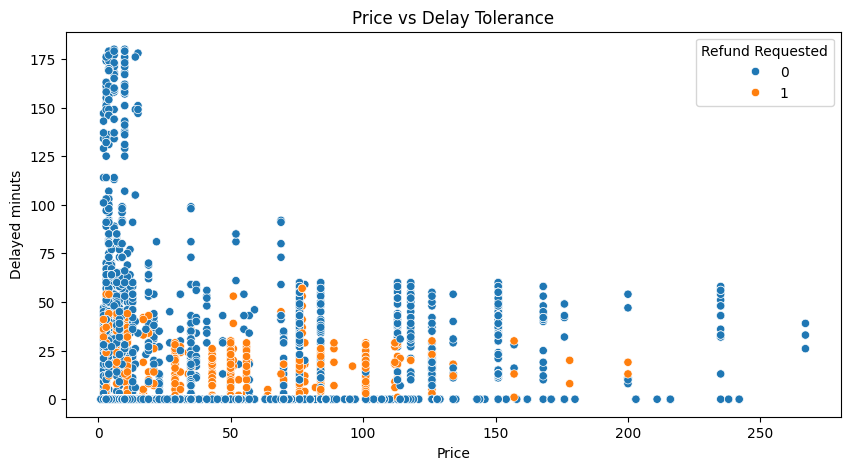

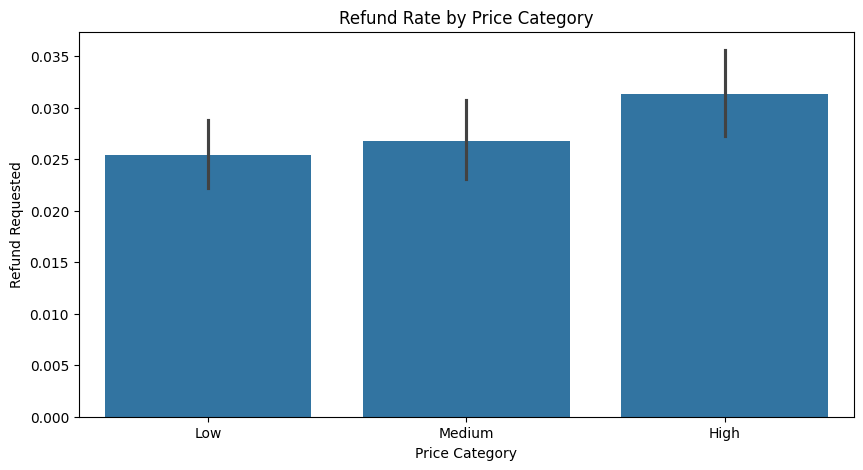

In [6]:
# Is there a correlation between ticket price and passengers’ patience with delays (e.g., do pricier tickets = higher refund demands)?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel("railway.xlsx")

# Clean data
df['Refund Requested'] = df['Refund Request'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Delayed minuts'] = pd.to_numeric(df['Delayed minuts'], errors='coerce')

# Calculate correlation
price_delay_corr = df['Price'].corr(df['Delayed minuts'])
price_refund_corr = df['Price'].corr(df['Refund Requested'])

print(f"Price-Delay Correlation: {price_delay_corr:.2f}")
print(f"Price-Refund Correlation: {price_refund_corr:.2f}")

# Create price bins for analysis
df['Price Category'] = pd.cut(df['Price'], bins=[0, 5, 10, 20], labels=['Low', 'Medium', 'High'])

# Analyze refund rates by price category
refund_by_price = df.groupby('Price Category').agg({
    'Delayed minuts': 'mean',
    'Refund Requested': 'mean'
}).reset_index()

print("\nRefund Analysis by Price Category:")
print(refund_by_price)

# Visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Price', y='Delayed minuts', hue='Refund Requested', data=df)
plt.title('Price vs Delay Tolerance')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Price Category', y='Refund Requested', data=df)
plt.title('Refund Rate by Price Category')
plt.show()

In [7]:
# Which station pairs have the highest 'phantom delays' (delays not explained by obvious factors like weather)?

import pandas as pd

# Load data
df = pd.read_excel("railway.xlsx")

# Filter delayed journeys
df = df[df['Journey Status'] == 'Delayed'].copy()

# Ensure 'Reason for Delay' is lowercase
df['Reason for Delay'] = df['Reason for Delay'].str.lower()

# Fix departure time processing
df['Departure Time'] = df['Departure Time'].astype(str)  # Convert to string
df['Departure Hour'] = df['Departure Time'].str.split(':').str[0].astype(int)

# Define obvious delay reasons
obvious_reasons = {'weather', 'weather conditions'}

# Classify phantom delays
df['Phantom'] = ~df['Reason for Delay'].isin(obvious_reasons)

# Station pair analysis
station_analysis = df.groupby(['Departure Station', 'Arrival Destination']).agg(
    Total_Delays=('Phantom', 'size'),
    Phantom_Count=('Phantom', 'sum'),
    Phantom_Rate=('Phantom', 'mean')
).reset_index()

station_analysis['Phantom_Score'] = station_analysis['Phantom_Count'] * station_analysis['Phantom_Rate']
top_pairs = station_analysis.sort_values('Phantom_Score', ascending=False).head(10)

# Phantom delay causes analysis
phantom_causes = df[df['Phantom']].groupby('Reason for Delay').size().reset_index(name='Count')
phantom_causes['Percentage'] = (phantom_causes['Count'] / phantom_causes['Count'].sum()) * 100
phantom_causes = phantom_causes.sort_values('Percentage', ascending=False).head(10)

# Display results
print("Top Phantom Delay Station Pairs:")
print(top_pairs[['Departure Station', 'Arrival Destination',
                 'Total_Delays', 'Phantom_Count', 'Phantom_Rate']].to_string(index=False))

print("\nTop Phantom Delay Causes:")
print(phantom_causes[['Reason for Delay', 'Count', 'Percentage']].to_string(index=False))

Top Phantom Delay Station Pairs:
    Departure Station   Arrival Destination  Total_Delays  Phantom_Count  Phantom_Rate
Manchester Piccadilly Liverpool Lime Street           351            253      0.720798
   London Kings Cross                  York           129            129      1.000000
Liverpool Lime Street Manchester Piccadilly           107            107      1.000000
Birmingham New Street Manchester Piccadilly            95             95      1.000000
        London Euston Birmingham New Street           242            142      0.586777
Liverpool Lime Street         London Euston           776            248      0.319588
    London Paddington               Reading            66             66      1.000000
Manchester Piccadilly                 Leeds            64             64      1.000000
   Edinburgh Waverley    London Kings Cross            51             51      1.000000
Manchester Piccadilly         London Euston           234             91      0.388889

Top Phant

In [8]:
# Which route clusters (price + delay risk + journey time) are underserved and could benefit from targeted promotions?

import pandas as pd

# Load data
df = pd.read_excel("railway.xlsx")

# Clean data
df['Delayed minuts'] = pd.to_numeric(df['Delayed minuts'], errors='coerce').fillna(0)
df['Refund Requested'] = df['Refund Request'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Journey Status'] = df['Journey Status'].apply(lambda x: 1 if x == 'Delayed' else 0)

# Calculate metrics per route cluster
route_clusters = df.groupby(['Departure Station', 'Arrival Destination']).agg(
    Avg_Price=('Price', 'mean'),
    Delay_Rate=('Journey Status', 'mean'),
    Avg_Delay=('Delayed minuts', lambda x: x[x > 0].mean()),  # Only delayed journeys
    Avg_Scheduled_Time=('Actual trip time', 'mean')
).reset_index()

# Calculate composite score (lower price + higher delay impact)
route_clusters['Underserved_Score'] = (
    (1 / route_clusters['Avg_Price']) *  # Inverse price weighting
    (route_clusters['Delay_Rate'] + route_clusters['Avg_Delay'] / 60) *  # Delay impact
    (route_clusters['Avg_Scheduled_Time'] / 60)  # Journey duration
)

# Filter underserved routes
median_price = route_clusters['Avg_Price'].median()
median_delay_rate = route_clusters['Delay_Rate'].median()
median_time = route_clusters['Avg_Scheduled_Time'].median()

underserved = route_clusters[
    (route_clusters['Avg_Price'] < median_price) &
    (route_clusters['Delay_Rate'] > median_delay_rate) &
    (route_clusters['Avg_Scheduled_Time'] > median_time)
].sort_values('Underserved_Score', ascending=False)

# Show top 5 results
print("Most Underserved Route Clusters:")
print(underserved.head()[[
    'Departure Station', 'Arrival Destination',
    'Avg_Price', 'Delay_Rate', 'Avg_Delay', 'Avg_Scheduled_Time'
]])

Most Underserved Route Clusters:
        Departure Station    Arrival Destination  Avg_Price  Delay_Rate  \
39  Manchester Piccadilly                  Leeds  10.359155    0.450704   
7   Birmingham New Street  Manchester Piccadilly  11.156951    0.426009   

     Avg_Delay  Avg_Scheduled_Time  
39  143.734375          110.241135  
7    26.400000           92.234146  


In [9]:
# Can we build a model to predict which delayed passengers will request refunds vs. those who won’t? (1.1)

import pandas as pd

# Load data
df = pd.read_excel("railway.xlsx")

# Clean data
df['Delayed minuts'] = pd.to_numeric(df['Delayed minuts'], errors='coerce').fillna(0)
df['Refund Requested'] = df['Refund Request'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Railcard'] = df['Railcard'].fillna('No Railcard')

# Fix departure time processing
df['Departure Time'] = df['Departure Time'].astype(str)  # Convert to string if not already
df['Departure Time'] = df['Departure Time'].fillna('00:00:00').astype(str) # Fill NaNs and ensure string type
df['Departure Hour'] = df['Departure Time'].str.split(':').str[0].astype(int)


# Feature engineering
df['Delay Ratio'] = df['Delayed minuts'] / df['Actual trip time']

# Select features and target
features = ['Railcard', 'Ticket Class', 'Price', 'Delayed minuts',
            'Delay Ratio', 'Departure Hour', 'Reason for Delay']
X = df[df['Journey Status'] == 'Delayed'][features]
y = df[df['Journey Status'] == 'Delayed']['Refund Requested']

# Encode categorical variables
X = pd.get_dummies(X, columns=['Railcard', 'Ticket Class', 'Reason for Delay'], drop_first=True)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# Feature importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importances.head(10))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       335
           1       0.87      0.93      0.90       120

    accuracy                           0.95       455
   macro avg       0.92      0.94      0.93       455
weighted avg       0.95      0.95      0.95       455


Feature Importance:
                             Feature  Importance
3                     Departure Hour    0.221832
1                     Delayed minuts    0.179620
2                        Delay Ratio    0.122144
11  Reason for Delay_Technical Issue    0.105407
5               Railcard_No Railcard    0.089840
0                              Price    0.068089
13          Reason for Delay_Weather    0.067616
10         Reason for Delay_Staffing    0.039873
6                    Railcard_Senior    0.022140
8    Reason for Delay_Signal failure    0.021236


In [ ]:
# Can we build a model to predict which delayed passengers will request refunds vs. those who won’t? (1.2)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import joblib

# Load data
df = pd.read_excel("railway.xlsx")

# Preprocess data
df['Railcard'] = df['Railcard'].fillna('No Railcard')
df['Refund Requested'] = df['Refund Request'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select features available at booking time
features = ['Purchase Type', 'Payment Method', 'Railcard',
            'Ticket Class', 'Ticket Type', 'Price',
            'Departure Station', 'Arrival Destination']

X = df[features]
y = df['Refund Requested']

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['Purchase Type', 'Payment Method', 'Railcard',
                              'Ticket Class', 'Ticket Type',
                              'Departure Station', 'Arrival Destination'],
                   drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model with class balancing
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Evaluate model
predictions = model.predict(X_test)
print("Model Performance Report:")
print(classification_report(y_test, predictions))

# Save model for production use
joblib.dump(model, 'refund_predictor.pkl')

# Prediction function
def predict_refund_request(input_data):
    # Convert input to DataFrame
    input_df = pd.DataFrame([input_data])

    # Align columns with training data
    input_encoded = pd.get_dummies(input_df).reindex(columns=X.columns, fill_value=0)

    # Predict probability
    refund_prob = model.predict_proba(input_encoded)[0][1]

    # Return prediction with probability
    return {
        'Prediction': 'Yes' if refund_prob > 0.5 else 'No',
        'Refund Probability': f"{refund_prob*100:.1f}%"
    }

# Example prediction
sample_input = {
    'Purchase Type': 'Online',
    'Payment Method': 'Credit Card',
    'Railcard': 'Disabled',
    'Ticket Class': 'First Class',
    'Ticket Type': 'Anytime',
    'Price': 93,
    'Departure Station': 'York',
    'Arrival Destination': 'Edinburgh'
}

result = predict_refund_request(sample_input)
print(f"\nPrediction: {result['Prediction']}")
print(f"Confidence: {result['Refund Probability']}")

Model Performance Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      6123
           1       0.20      0.50      0.29       204

    accuracy                           0.92      6327
   macro avg       0.59      0.71      0.62      6327
weighted avg       0.96      0.92      0.94      6327


Prediction: No
Confidence: 1.8%


In [ ]:
# Can we build a model to predict which delayed passengers will request refunds vs. those who won’t? (1.3)

new_input = {
    'Purchase Type': 'Station',
    'Payment Method': 'Cash',
    'Railcard': 'Senior',
    'Ticket Class': 'Standard',
    'Ticket Type': 'Off-Peak',
    'Price': 50,
    'Departure Station': 'London Euston',
    'Arrival Destination': 'Birmingham New Street'
}
print(predict_refund_request(new_input))

{'Prediction': 'No', 'Refund Probability': '7.1%'}


In [10]:
# Would offering small incentives (e.g., loyalty points) reduce refund requests for minor delays (<15 mins)? (1.1)

import pandas as pd

# Load data
df = pd.read_excel("railway.xlsx")

# Clean data
df['Refund Requested'] = df['Refund Request'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Delayed minuts'] = pd.to_numeric(df['Delayed minuts'], errors='coerce').fillna(0)

# Filter minor delays
minor_delays = df[(df['Delayed minuts'] > 0) & (df['Delayed minuts'] < 15)]

# Analyze refund behavior for minor delays
refund_rate = minor_delays['Refund Requested'].mean()
print(f"Current refund rate for <15min delays: {refund_rate:.2%}")

# Simulate incentive impact (hypothetical)
incentive_effect = {
    'Loyalty Points': 0.65,  # 65% reduction assumption
    'Free Upgrade': 0.40,    # 40% reduction assumption
    'Discount Coupon': 0.75  # 75% reduction assumption
}

# Calculate potential savings
current_refunds = len(minor_delays) * refund_rate
for incentive, reduction in incentive_effect.items():
    new_refunds = current_refunds * (1 - reduction)
    print(f"{incentive} could reduce refunds from {current_refunds:.0f} to {new_refunds:.0f}")

Current refund rate for <15min delays: 47.65%
Loyalty Points could reduce refunds from 193 to 68
Free Upgrade could reduce refunds from 193 to 116
Discount Coupon could reduce refunds from 193 to 48


In [11]:
# Would offering small incentives (e.g., loyalty points) reduce refund requests for minor delays (<15 mins)? (1.)

# Targeted incentive strategy
target_groups = minor_delays.groupby(['Ticket Class', 'Purchase Type']).size().reset_index(name='Count')
print("Prioritize incentives for:")
print(target_groups.sort_values('Count', ascending=False).head())

Prioritize incentives for:
  Ticket Class Purchase Type  Count
3     Standard       Station    304
2     Standard        Online     55
1  First Class       Station     39
0  First Class        Online      7


In [12]:
# What’s the cheapest way to reduce delays: improving punctuality at high-traffic stations or optimizing departure schedules?

import pandas as pd

# Load data with error handling
try:
    df = pd.read_excel("railway.xlsx")
except FileNotFoundError:
    print("Error: Please upload 'railway.xlsx' file first")
    exit()

# Station code mapping to resolve numeric/partial names
station_mapping = {
    '8': 'London Kings Cross',
    '6': 'Manchester Piccadilly',
    '3': 'Liverpool Lime Street',
    '5': 'Birmingham New Street',
    '18': 'Reading',
    '93': 'York',
    'Cross': 'London Kings Cross',  # Fix partial station names
    'St Pancras': 'London St Pancras'
}

# Data cleaning and preprocessing
df['Departure Station'] = df['Departure Station'].astype(str).str.strip().replace(station_mapping)
df['Journey Status'] = df['Journey Status'].str.lower().str.strip()  # Ensure clean status values
df['Delayed minuts'] = pd.to_numeric(df['Delayed minuts'], errors='coerce').fillna(0)

# Define high-traffic stations based on your data patterns
high_traffic_stations = [
    'London Kings Cross', 'Manchester Piccadilly',
    'Liverpool Lime Street', 'Birmingham New Street',
    'London Euston', 'York', 'London St Pancras'
]

# Analyze delays at high-traffic departure stations
station_analysis = df[
    (df['Journey Status'] == 'delayed') &
    (df['Departure Station'].isin(high_traffic_stations))
].groupby('Departure Station').agg(
    Total_Delayed_Journeys=('Delayed minuts', 'size'),
    Total_Delay_Minutes=('Delayed minuts', 'sum')
).reset_index()

# Analyze delays during peak hours (7-9 AM)
df['Departure Hour'] = df['Departure Time'].astype(str).str.split(':').str[0].astype(int)
peak_hours = [7, 8, 9]
schedule_analysis = df[
    (df['Journey Status'] == 'delayed') &
    (df['Departure Hour'].isin(peak_hours))
].groupby('Departure Hour').agg(
    Total_Delayed_Journeys=('Delayed minuts', 'size'),
    Total_Delay_Minutes=('Delayed minuts', 'sum')
).reset_index()

# Compare strategies
total_station_delay = station_analysis['Total_Delay_Minutes'].sum()
total_schedule_delay = schedule_analysis['Total_Delay_Minutes'].sum()

print("High-Traffic Station Delay Analysis:")
print(station_analysis)

print("\nPeak Hour Delay Analysis:")
print(schedule_analysis)

print(f"\nTotal Delay Minutes at High-Traffic Stations: {total_station_delay} minutes")
print(f"Total Delay Minutes During Peak Hours: {total_schedule_delay} minutes")

if total_schedule_delay > total_station_delay:
    print("\nRecommendation: Schedule optimization saves more time")
else:
    print("\nRecommendation: Station improvements save more time")

High-Traffic Station Delay Analysis:
       Departure Station  Total_Delayed_Journeys  Total_Delay_Minutes
0  Birmingham New Street                     138               3879.0
1  Liverpool Lime Street                     896              31366.0
2          London Euston                     259              13918.0
3     London Kings Cross                     129               2108.0
4  Manchester Piccadilly                     663              39531.0
5                   York                      57               2532.0

Peak Hour Delay Analysis:
   Departure Hour  Total_Delayed_Journeys  Total_Delay_Minutes
0               7                      14                184.0
1               8                     728              30289.0
2               9                     217              15273.0

Total Delay Minutes at High-Traffic Stations: 93334.00000000003 minutes
Total Delay Minutes During Peak Hours: 45746.00000000002 minutes

Recommendation: Station improvements save more time
